In [17]:
%matplotlib inline

from __future__ import (print_function, division, absolute_import,
                        unicode_literals)
from approxposterior import bp, likelihood as lh
import corner

import matplotlib.pyplot as plt

In [7]:
# Define algorithm parameters
m0 = 20 # Initialize size of training set
m = 10 # Number of new points to find each iteration
nmax = 10 # Maximum number of iterations
M = int(1.0e4) # Number of MCMC steps to estimate approximate posterior
Dmax = 0.1
kmax = 5
cv = None
which_kernel = "ExpSquaredKernel"
bounds = ((-5,5), (-5,5))

In [8]:
# Init object
agp = bp.ApproxPosterior(lnprior=lh.rosenbrock_lnprior,
                         lnlike=lh.rosenbrock_lnlike,
                         lnprob = lh.rosenbrock_lnprob,
                         prior_sample=lh.rosenbrock_sample,
                         algorithm="agp")

In [9]:
# Run!
agp.run(m0=m0, m=m, M=M, nmax=nmax, Dmax=Dmax, kmax=kmax, cv=cv,
       sampler=None, bounds=bounds, which_kernel=which_kernel,
       n_kl_samples=100000, verbose=False, debug=False)

(-0.05, 0.01)

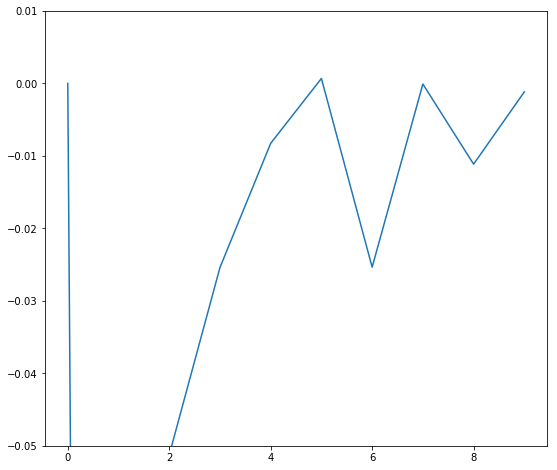

In [16]:
fig, ax = plt.subplots(figsize=(9,8))

ax.plot(agp.Dkl)
ax.set_ylim(-5.0e-2,1.0e-2)

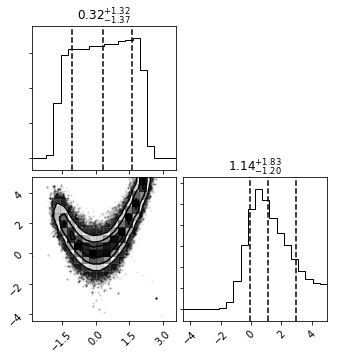

In [24]:
fig = corner.corner(agp._ApproxPosterior__samplers[-1].flatchain[agp._ApproxPosterior__iburns[-1]:],
                    quantiles=[0.16, 0.5, 0.84], show_titles=True, scale_hist=True,
                    plot_contours=True);